In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import torch

In [2]:
vf = np.vectorize(lambda x: x**2 + 1)

xs = np.arange(-4,4,0.1)
ys = vf(xs)

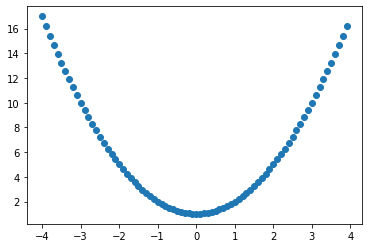

In [3]:
plt.scatter(xs,ys)

In [4]:
class FunctionApprox(torch.nn.Module):
    def __init__(self, shape, activation_fn):
        """ Construct a neural network for the desired problem type

        Arguments:
            shape: list of number of nodes in each layer
            problem_type: Classification or regression problem being solved with the model
        """
        super(FunctionApprox, self).__init__()
        self.model = torch.nn.Sequential()
        self._shape = shape
        for i in range(len(shape) - 1):
            layer = torch.nn.Linear(shape[i], shape[i + 1])
            torch.nn.init.kaiming_normal_(layer.weight)
            self.model.append(layer)
            if i != len(shape) - 2:
                self.model.append(activation_fn())

        print(self.model)

    def forward(self, x: torch.Tensor):
        """ Forward pass through network

        Arguments:
            x: input sample to make prediction on

        Returns:
            Predicted output for the input
        """

        return self.model(x)
    
    def calc_n_params(self) -> int:
        params = 0
        for i in range(len(self._shape) - 1):
            params += self._shape[i] * self._shape[i+1]
        print(f'params: {params}')
        return params

In [23]:
shape = [1, 50, 50, 1]
model = FunctionApprox(shape, torch.nn.ReLU)
epochs = 30

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(epochs):
    for x,y in zip(xs,ys):
        x = torch.tensor([x]).float()
        y = torch.tensor([y]).float()

        prediction = model(x)
        loss = loss_fn(prediction, y)
        print(f'Epoch {epoch}: {loss}')
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Sequential(
  (0): Linear(in_features=1, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=1, bias=True)
)
Epoch 0: 452.1025390625
Epoch 0: 388.1784973144531
Epoch 0: 331.25335693359375
Epoch 0: 280.7989807128906
Epoch 0: 237.47193908691406
Epoch 0: 200.15011596679688
Epoch 0: 167.61351013183594
Epoch 0: 139.3525848388672
Epoch 0: 114.93621826171875
Epoch 0: 93.99566650390625
Epoch 0: 76.25804138183594
Epoch 0: 61.60714340209961
Epoch 0: 49.45881652832031
Epoch 0: 39.318599700927734
Epoch 0: 30.931217193603516
Epoch 0: 24.060945510864258
Epoch 0: 18.49217987060547
Epoch 0: 14.028454780578613
Epoch 0: 10.40701675415039
Epoch 0: 7.583140850067139
Epoch 0: 5.465085029602051
Epoch 0: 3.8612265586853027
Epoch 0: 2.6647400856018066
Epoch 0: 1.7922441959381104
Epoch 0: 1.1769518852233887
Epoch 0: 0.7627671360969543
Epoch 0: 0.5031149983406067
Epoch 0: 0.33619168400764465
Epoch 0: 0.23133

In [24]:
model.eval()
predictions = []
for x in xs:
    x = torch.tensor([x]).float()
    pred = model(x)
    predictions.append(pred.item())

predictions = np.array(predictions)

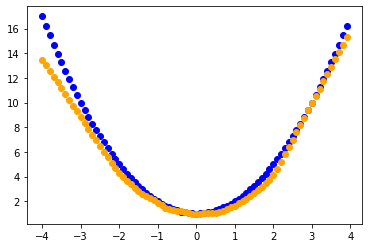

In [25]:
plt.scatter(xs, ys, color='blue')
plt.scatter(xs, predictions, color='orange')
plt.show()